In [1]:
import pandas as pd 
import numpy as np 
import joblib
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import (
    cross_val_score, KFold, train_test_split
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
dt = pd.read_csv('../data/btcdata.csv')
dt.pop('Unnamed: 0')
dt.head()

,Timestamp,Open,atr,ad,prev_10d_slope,prev_5d_slope,obv,rsi2,mfi2,macd,target
0,1417046400,368.50,1.79,-102650.0,-0.04,0.09,380657.97,-48.91,-93.06,-1.69,0.02
1,1417048200,371.02,1.78,-102650.0,-0.05,0.07,380652.39,-47.78,-93.08,-1.68,0.03
2,1417050000,371.91,1.78,-102604.5,-0.05,0.08,380697.96,-49.90,-93.98,-1.64,0.02
3,1417051800,371.06,1.78,-102668.0,-0.06,0.08,380634.38,-47.91,-94.78,-1.63,0.03
4,1417053600,369.05,1.78,-104370.2,-0.06,0.07,378932.27,-45.63,-95.37,-1.66,0.03


(array([7.0000e+00, 1.1000e+01, 3.0000e+01, 2.5000e+01, 1.8000e+01,
        3.4000e+01, 4.9000e+01, 9.2000e+01, 1.3200e+02, 1.6700e+02,
        3.7900e+02, 7.4900e+02, 1.2820e+03, 4.0870e+03, 2.3001e+04,
        6.8429e+04, 6.9500e+03, 2.0920e+03, 8.4800e+02, 6.4900e+02,
        4.7900e+02, 2.0600e+02, 2.0900e+02, 2.1700e+02, 1.8100e+02,
        1.5600e+02, 1.4900e+02, 6.4000e+01, 1.0000e+01, 1.0000e+00]),
 array([-48.38      , -45.16533333, -41.95066667, -38.736     ,
        -35.52133333, -32.30666667, -29.092     , -25.87733333,
        -22.66266667, -19.448     , -16.23333333, -13.01866667,
         -9.804     ,  -6.58933333,  -3.37466667,  -0.16      ,
          3.05466667,   6.26933333,   9.484     ,  12.69866667,
         15.91333333,  19.128     ,  22.34266667,  25.55733333,
         28.772     ,  31.98666667,  35.20133333,  38.416     ,
         41.63066667,  44.84533333,  48.06      ]),
 <BarContainer object of 30 artists>)

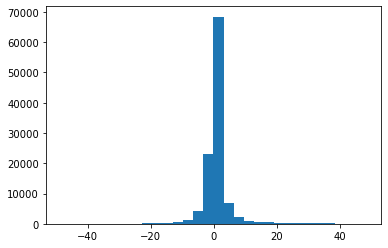

In [15]:
plt.hist(dt['target'], bins=30)

In [26]:
dt['target']

0          0.02
1          0.03
2          0.02
3          0.03
4          0.03
          ...  
110698    29.61
110699    28.91
110700    28.18
110701    27.58
110702    25.97
Name: target, Length: 110703, dtype: float64

In [22]:
print(dt['target'].mean() + 3 * dt['target'].std(), 'max')
print(dt['target'].mean() - 3 * dt['target'].std(), 'min')


14.630084792791983 max
-13.629190327420673 min


In [39]:
dt = dt[dt['target'] < 14.5]
dt = dt[dt['target'] > -13.5]

In [51]:
X = dt[['atr', 'ad', 'prev_10d_slope', 'prev_5d_slope', 'obv', 'rsi2', 'mfi2', 'macd']]
y = dt['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [53]:
kf = KFold(n_splits=4, shuffle=True, random_state=1)
mse_values = []

for train, test in kf.split(dt):

    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

    model = RandomForestRegressor().fit(X_train, y_train)
    predict = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, predict))

print(mse_values)
print(np.mean(mse_values))

[0.18227000595136594, 0.18784185877817317, 0.17227283903655102, 0.21107186541073544]
0.1883641422942064


In [55]:
joblib.dump(model, '../models/model2.plk')

['../models/model2.plk']